In [4]:
print("Author:  Liubov Soldatenko")


Author:  Liubov Soldatenko


In [97]:
%pip install pandas==2.1.0 numpy==1.24.3 scikit-learn==1.3.0 joblib==1.2.0 seaborn==0.13.0 matplotlib==3.7.1

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [207]:
DATA_PATH = "/Users/liubov/test_lingvano/customer_transactions.csv"
data=pd.read_csv(DATA_PATH, parse_dates=['Date'])
data.head()

,Order ID,Order Status,Order Type,Product ID,Product Name,Product Taxable Category,Customer Email,Customer age (at first purchase),Customer Country,Customer Zip Code,...,Total,Tax,Fee,Currency,Balance Earnings,Balance Currency,Source,Checkout,Date,User Subscription ID
0,32188045-35747701,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_3520@email.com,23,US,20774,...,119.88,6.79,6.49,USD,97.39,EUR,lingvano.com / lingvano.com,124979605-chreb781fa88801-aba221f983,2023-01-01 00:29:54,10637011.0
1,21824796-35749002,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_3054@email.com,33,US,37072,...,119.88,10.15,6.49,USD,94.32,EUR,lingvano.com / lingvano.com,78755154-chre2be59379e88-f5d16afda0,2023-01-01 00:32:36,5693651.0
2,21823580-57135378,Completed,subscription,634288,Lingvano ASL Premium quarterly,standard,anonymous_2307@email.com,43,US,97526,...,47.97,0,2.9,USD,41.18,EUR,lingvano.com / lingvano.com,78750494-chree25a9c17e42-c5c0ca7931,2023-01-01 00:59:52,5693067.0
3,22659879-62720615,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_23@email.com,65,US,85040,...,12.59,1,1.13,USD,9.56,EUR,lingvano.com / lingvano.com,82323605-chre01611191fe4-d0def74dec,2023-01-01 01:41:04,6058913.0
4,34337096-62727157,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_1455@email.com,27,US,93933,...,17.99,0,1.4,USD,15.16,EUR,lingvano.com / lingvano.com,136534158-chre5e4ad23d443-090328243b,2023-01-01 02:03:56,11850281.0


In [208]:
# Task
#!pip install psycopg2-binary SQLAlchemy

In [209]:
# import pandas as pd
# import psycopg2 as pg

# engine = pg.connect("dbname='lingvano' user='postgres' host='127.0.0.1' port='5432' password='postgres'")
# df = pd.read_sql('select * from foo', con=engine)

# <span style='color:#4682B4'> 2.  Basic transformation  </span>


### Removing duplicates (e.g. duplicated transactions)

In [210]:
data.shape

(13082, 22)

In [211]:
data.head()

,Order ID,Order Status,Order Type,Product ID,Product Name,Product Taxable Category,Customer Email,Customer age (at first purchase),Customer Country,Customer Zip Code,...,Total,Tax,Fee,Currency,Balance Earnings,Balance Currency,Source,Checkout,Date,User Subscription ID
0,32188045-35747701,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_3520@email.com,23,US,20774,...,119.88,6.79,6.49,USD,97.39,EUR,lingvano.com / lingvano.com,124979605-chreb781fa88801-aba221f983,2023-01-01 00:29:54,10637011.0
1,21824796-35749002,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_3054@email.com,33,US,37072,...,119.88,10.15,6.49,USD,94.32,EUR,lingvano.com / lingvano.com,78755154-chre2be59379e88-f5d16afda0,2023-01-01 00:32:36,5693651.0
2,21823580-57135378,Completed,subscription,634288,Lingvano ASL Premium quarterly,standard,anonymous_2307@email.com,43,US,97526,...,47.97,0,2.9,USD,41.18,EUR,lingvano.com / lingvano.com,78750494-chree25a9c17e42-c5c0ca7931,2023-01-01 00:59:52,5693067.0
3,22659879-62720615,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_23@email.com,65,US,85040,...,12.59,1,1.13,USD,9.56,EUR,lingvano.com / lingvano.com,82323605-chre01611191fe4-d0def74dec,2023-01-01 01:41:04,6058913.0
4,34337096-62727157,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_1455@email.com,27,US,93933,...,17.99,0,1.4,USD,15.16,EUR,lingvano.com / lingvano.com,136534158-chre5e4ad23d443-090328243b,2023-01-01 02:03:56,11850281.0


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13082 entries, 0 to 13081
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Order ID                          13082 non-null  object        
 1   Order Status                      13082 non-null  object        
 2   Order Type                        13082 non-null  object        
 3   Product ID                        13082 non-null  int64         
 4   Product Name                      13082 non-null  object        
 5   Product Taxable Category          13082 non-null  object        
 6   Customer Email                    13082 non-null  object        
 7   Customer age (at first purchase)  13082 non-null  int64         
 8   Customer Country                  13082 non-null  object        
 9   Customer Zip Code                 12432 non-null  object        
 10  Coupon Applied                    177 non-null

In [213]:
duplicated_rows = data[data.duplicated(subset=['Order ID'])]
duplicated_rows['Order ID'].head(22)

85        32361109-36134116
5048      49539691-83338018
5049      49539691-83338018
10642    54795842-103960203
Name: Order ID, dtype: object

In [214]:
duplicated_rows = data[data.duplicated()]
duplicated_rows

,Order ID,Order Status,Order Type,Product ID,Product Name,Product Taxable Category,Customer Email,Customer age (at first purchase),Customer Country,Customer Zip Code,...,Total,Tax,Fee,Currency,Balance Earnings,Balance Currency,Source,Checkout,Date,User Subscription ID
85,32361109-36134116,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_4149@email.com,35,US,80227,...,119.88,0,6.49,USD,104.74,EUR,lingvano.com / lingvano.com,125947660-chrefcb1fa0a99d-6b5929f7e1,2023-01-05 00:53:46,10737494.0
5048,49539691-83338018,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_468@email.com,38,US,43318,...,17.99,1.22,1.4,USD,13.96,EUR,app.lingvano.com / lingvano.com,212669364-chre51680f29b54-f1785c437d,2023-09-03 02:36:49,20834869.0
5049,49539691-83338018,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_468@email.com,38,US,43318,...,17.99,1.22,1.4,USD,13.96,EUR,app.lingvano.com / lingvano.com,212669364-chre51680f29b54-f1785c437d,2023-09-03 02:36:49,20834869.0
10642,54795842-103960203,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_1349@email.com,33,US,83854,...,17.99,0,1.4,USD,15.09,EUR,app.lingvano.com / lingvano.com,238071735-chre0fab0d0d2a0-f1f87b8c88,2024-05-07 01:51:10,23671007.0


In [215]:
#drop dublicates
data_drop_dublicates=data.copy()
data_drop_dublicates.drop_duplicates(inplace=True)
data_drop_dublicates.shape[0]
print("#dublicated rows removed: ", data.shape[0]-data_drop_dublicates.shape[0])

#dublicated rows removed:  4


### Filtering null values or test data (e.g. check user subscription ID)

In [216]:
data_drop_dublicates.isnull().values.any() 

True

In [217]:
data_drop_dublicates.isna().sum()

Order ID                                0
Order Status                            0
Order Type                              0
Product ID                              0
Product Name                            0
Product Taxable Category                0
Customer Email                          0
Customer age (at first purchase)        0
Customer Country                        0
Customer Zip Code                     650
Coupon Applied                      12901
Quantity                                0
Total                                   0
Tax                                     0
Fee                                     0
Currency                                0
Balance Earnings                       18
Balance Currency                       18
Source                                  0
Checkout                                0
Date                                    0
User Subscription ID                   18
dtype: int64

In [218]:
data_drop_dublicates[['Balance Earnings', 'Balance Currency', 'User Subscription ID']][data_drop_dublicates['User Subscription ID'].isna()]

,Balance Earnings,Balance Currency,User Subscription ID
57,NaN,NaN,NaN
7218,NaN,NaN,NaN
7219,NaN,NaN,NaN
7281,NaN,NaN,NaN
7282,NaN,NaN,NaN
7292,NaN,NaN,NaN
7293,NaN,NaN,NaN
7294,NaN,NaN,NaN
7295,NaN,NaN,NaN
7296,NaN,NaN,NaN


In [219]:
#remove NaN "User Subscription ID" rows
data_clean = data_drop_dublicates.copy()
data_clean=data_clean.dropna(subset=['User Subscription ID'])
print("# NaN rows were removed: ", data_drop_dublicates.shape[0]-data_clean.shape[0])

# NaN rows were removed:  18


In [220]:
data_clean.shape

(13060, 22)

In [221]:
print("# rows, raw data: ", data.shape[0])
print("# rows, data_drop_dublicates: ", data_drop_dublicates.shape[0])
print("# rows, data_clean: ", data_clean.shape[0])


# rows, raw data:  13082
# rows, data_drop_dublicates:  13078
# rows, data_clean:  13060


### Data type casting

In [222]:
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13060 entries, 0 to 13081
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Order ID                          13060 non-null  object        
 1   Order Status                      13060 non-null  object        
 2   Order Type                        13060 non-null  object        
 3   Product ID                        13060 non-null  int64         
 4   Product Name                      13060 non-null  object        
 5   Product Taxable Category          13060 non-null  object        
 6   Customer Email                    13060 non-null  object        
 7   Customer age (at first purchase)  13060 non-null  int64         
 8   Customer Country                  13060 non-null  object        
 9   Customer Zip Code                 12427 non-null  object        
 10  Coupon Applied                    159 non-null    o

In [223]:
# data types columns
int_col=['Product ID','Customer age (at first purchase)','Quantity','User Subscription ID']
str_col=['Order Status','Order Type','Product Name','Product Taxable Category','Customer Email',
         'Customer Country','Customer Zip Code','Coupon Applied','Currency','Balance Currency','Source','Checkout']
float_col=['Total', 'Tax','Fee','Balance Earnings']

In [224]:
data_clean[str_col] = data_clean[str_col].astype(str)
data_clean[int_col] = data_clean[int_col].astype(int)

#data_clean[float_col] = data_clean[float_col].astype(float)
data_clean[float_col]  = data_clean[float_col].replace(',', '', regex=True).astype(float)
data_clean.dtypes

Order ID                                    object
Order Status                                object
Order Type                                  object
Product ID                                   int64
Product Name                                object
Product Taxable Category                    object
Customer Email                              object
Customer age (at first purchase)             int64
Customer Country                            object
Customer Zip Code                           object
Coupon Applied                              object
Quantity                                     int64
Total                                      float64
Tax                                        float64
Fee                                        float64
Currency                                    object
Balance Earnings                           float64
Balance Currency                            object
Source                                      object
Checkout                       

# <span style='color:#4682B4'> 3. Insights  </span>


1. Correlate two variables of your choice.
    - Why did you choose them?
    - What insights does your correlation provide?

I would like to find the correlation between the customer's country and the type of product that the customer purchases. This information could help with customer segmentation in the future by proposing the correct products to the right customers.

In [244]:
data_clean.head()

,Order ID,Order Status,Order Type,Product ID,Product Name,Product Taxable Category,Customer Email,Customer age (at first purchase),Customer Country,Customer Zip Code,...,Total,Tax,Fee,Currency,Balance Earnings,Balance Currency,Source,Checkout,Date,User Subscription ID
0,32188045-35747701,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_3520@email.com,23,US,20774,...,119.88,6.79,6.49,USD,97.39,EUR,lingvano.com / lingvano.com,124979605-chreb781fa88801-aba221f983,2023-01-01 00:29:54,10637011
1,21824796-35749002,Completed,subscription,637133,Lingvano ASL Premium yearly,standard,anonymous_3054@email.com,33,US,37072,...,119.88,10.15,6.49,USD,94.32,EUR,lingvano.com / lingvano.com,78755154-chre2be59379e88-f5d16afda0,2023-01-01 00:32:36,5693651
2,21823580-57135378,Completed,subscription,634288,Lingvano ASL Premium quarterly,standard,anonymous_2307@email.com,43,US,97526,...,47.97,0.00,2.90,USD,41.18,EUR,lingvano.com / lingvano.com,78750494-chree25a9c17e42-c5c0ca7931,2023-01-01 00:59:52,5693067
3,22659879-62720615,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_23@email.com,65,US,85040,...,12.59,1.00,1.13,USD,9.56,EUR,lingvano.com / lingvano.com,82323605-chre01611191fe4-d0def74dec,2023-01-01 01:41:04,6058913
4,34337096-62727157,Completed,subscription,634286,Lingvano ASL Premium monthly,standard,anonymous_1455@email.com,27,US,93933,...,17.99,0.00,1.40,USD,15.16,EUR,lingvano.com / lingvano.com,136534158-chre5e4ad23d443-090328243b,2023-01-01 02:03:56,11850281


As we have total balance trenf

# <span style='color:#4682B4'> 4. Visualization  </span>


### Trend in balance earnings over time (in EUR)

The Order Status field was not taken into account.  

I have decided to show the total earnings trend per month for different years.

In [232]:
df=data_clean.copy()

In [233]:
def extract_date_info(df):
    """
    function to extract date info (day, year, month and etc) 
    """
    df['date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day.astype('int')
    df['Month'] = df['Date'].dt.month.astype('int')
    df['Year'] = df['Date'].dt.year.astype('int')
    df['DayOfWeek'] = df['Date'].dt.weekday
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype('int')
    df = df.drop(columns = ['Date'], inplace=True)

    return df

In [236]:
extract_date_info(df)


In [237]:
df.columns

Index(['Order ID', 'Order Status', 'Order Type', 'Product ID', 'Product Name',
       'Product Taxable Category', 'Customer Email',
       'Customer age (at first purchase)', 'Customer Country',
       'Customer Zip Code', 'Coupon Applied', 'Quantity', 'Total', 'Tax',
       'Fee', 'Currency', 'Balance Earnings', 'Balance Currency', 'Source',
       'Checkout', 'User Subscription ID', 'date', 'Day', 'Month', 'Year',
       'DayOfWeek', 'WeekOfYear'],
      dtype='object')

In [238]:
df['Year'].unique()

array([2023, 2024])

In [239]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [241]:
df_grouped_by_month=df.groupby(['Year','Month'])['Balance Earnings'].sum().reset_index()
df_grouped_by_month.sort_index(inplace=True)
df_grouped_by_month.head()

,Year,Month,Balance Earnings
0,2023,1,22734.67
1,2023,2,22197.32
2,2023,3,22656.34
3,2023,4,19442.74
4,2023,5,20027.24


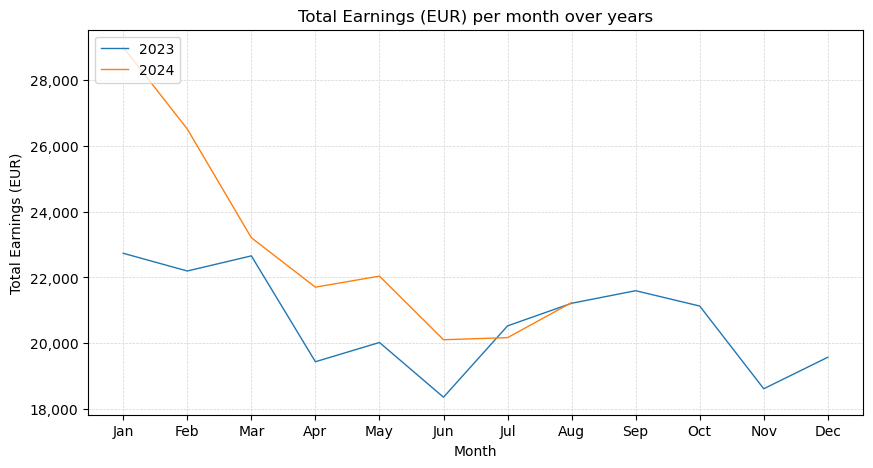

In [243]:
plt.figure(figsize=(10, 5))
years=list(df_grouped_by_month['Year'].unique())

for i in years:
    plt.plot(df_grouped_by_month['Month'][df_grouped_by_month['Year']==i], 
         df_grouped_by_month['Balance Earnings'][df_grouped_by_month['Year']==i], label=i, linewidth=1)
    

fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ytick)
plt.xticks(range(1,13,1),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(ncol=1, loc='upper left',facecolor='white')
plt.gca().set_facecolor("white")
plt.title("Total Earnings (EUR) per month over years")
plt.xlabel("Month")
plt.ylabel("Total Earnings (EUR)")

plt.grid(axis = 'x',color='lightgrey', linestyle='--', linewidth=0.5)
plt.grid(axis = 'y',color='lightgrey', linestyle='--', linewidth=0.5)

As we can see from the chart above, there is a growing trend in total earnings for 2024 compared to 2023 in the first half of the year.

### Subscription plan (product) distribution

In [125]:
# I will show the distribution of order counts and order amounts by Product ID.

In [135]:
product_distribution=data_clean[['Order ID','Product ID','Product Name','Balance Earnings']].copy()

In [139]:
#product_distribution['Product ID'].unique()

In [138]:
#product_distribution[['Product ID','Product Name']].drop_duplicates()

In [140]:
grouped_product = product_distribution.groupby('Product Name').agg(
    orders_count=('Order ID', 'count'),
    total_balance=('Balance Earnings', 'sum')
).reset_index()

grouped_product


,Product Name,orders_count,total_balance
0,Lingvano ASL Premium biannually,8,458.91
1,Lingvano ASL Premium monthly,7650,107227.83
2,Lingvano ASL Premium monthly -30%,20,231.94
3,Lingvano ASL Premium quarterly,2293,86704.06
4,Lingvano ASL Premium quarterly -30%,8,237.14
5,Lingvano ASL Premium yearly,2063,199650.46
6,Lingvano ASL Premium yearly -30%,12,838.29
7,Lingvano BSL Premium monthly,393,6195.45
8,Lingvano BSL Premium quarterly,111,4765.43
9,Lingvano BSL Premium yearly,116,12212.04


In [142]:
orders_count=grouped_product[['Product Name', 'orders_count']].copy()
orders_count.sort_values(by='orders_count', ascending=False, inplace=True)
orders_count

,Product Name,orders_count
1,Lingvano ASL Premium monthly,7650
3,Lingvano ASL Premium quarterly,2293
5,Lingvano ASL Premium yearly,2063
7,Lingvano BSL Premium monthly,393
11,Lingvano ÖGS Premium monthly,215
9,Lingvano BSL Premium yearly,116
8,Lingvano BSL Premium quarterly,111
12,Lingvano ÖGS Premium quarterly,88
13,Lingvano ÖGS Premium yearly,78
2,Lingvano ASL Premium monthly -30%,20


/var/folders/sp/f7xkr76d0dqgwhvyyq7wyzm00000gn/T/ipykernel_2411/763091667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot=sns.barplot(x='Product Name', y='orders_count', data=orders_count, palette='viridis')


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(-2.0, 0, ''),
  Text(0.0, 0, 'Lingvano ASL Premium monthly'),
  Text(2.0, 0, 'Lingvano ASL Premium yearly'),
  Text(4.0, 0, 'Lingvano ÖGS Premium monthly'),
  Text(6.0, 0, 'Lingvano BSL Premium quarterly'),
  Text(8.0, 0, 'Lingvano ÖGS Premium yearly'),
  Text(10.0, 0, 'Lingvano ASL Premium yearly -30%'),
  Text(12.0, 0, 'Lingvano ASL Premium quarterly -30%'),
  Text(14.0, 0, '')])

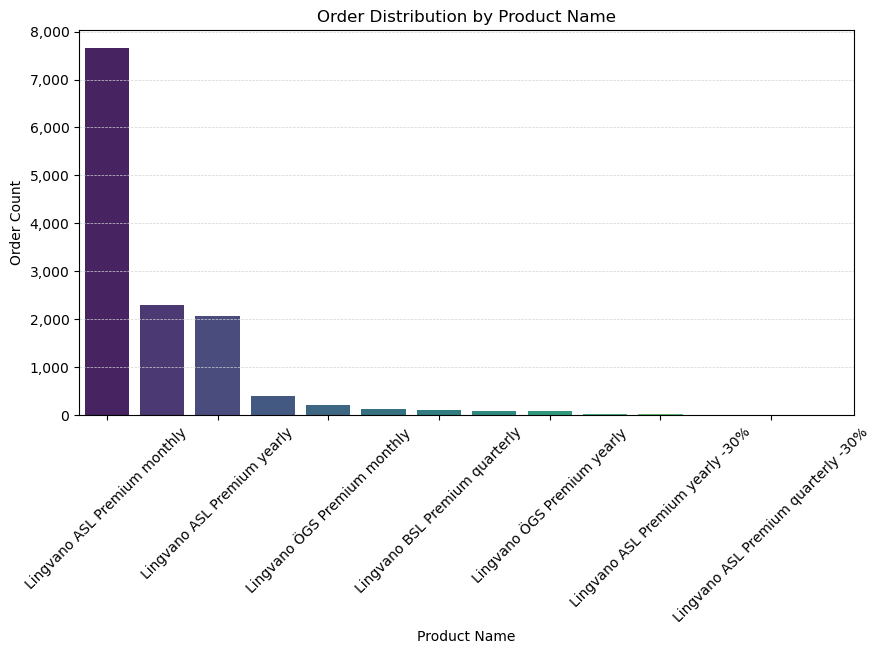

In [178]:
plt.figure(figsize=(10, 5))

bar_plot=sns.barplot(x='Product Name', y='orders_count', data=orders_count, palette='viridis')
plt.title('Order Distribution by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Order Count')

plt.grid(axis='y',color='lightgrey', linestyle='--', linewidth=0.5)
fmt = '{x:,.0f}'
ytick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ytick)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.xticks(rotation=45)


In [187]:
total_amount=grouped_product[['Product Name', 'total_balance']].copy()
total_amount.sort_values(by='total_balance', ascending=False, inplace=True)
total_amount['amount_distribution']=round(total_amount['total_balance']/total_amount['total_balance'].sum()*100,1)
total_amount
# Calculate percentage distribution
#amount_distribution = order_counts / order_counts.sum() * 100
# amount_distribution.sort_values(by='total_balance', ascending=False, inplace=True)
# amount_distribution

,Product Name,total_balance,amount_distribution
5,Lingvano ASL Premium yearly,199650.46,46.2
1,Lingvano ASL Premium monthly,107227.83,24.8
3,Lingvano ASL Premium quarterly,86704.06,20.1
9,Lingvano BSL Premium yearly,12212.04,2.8
13,Lingvano ÖGS Premium yearly,7216.83,1.7
7,Lingvano BSL Premium monthly,6195.45,1.4
8,Lingvano BSL Premium quarterly,4765.43,1.1
12,Lingvano ÖGS Premium quarterly,3244.37,0.8
11,Lingvano ÖGS Premium monthly,2794.71,0.6
6,Lingvano ASL Premium yearly -30%,838.29,0.2


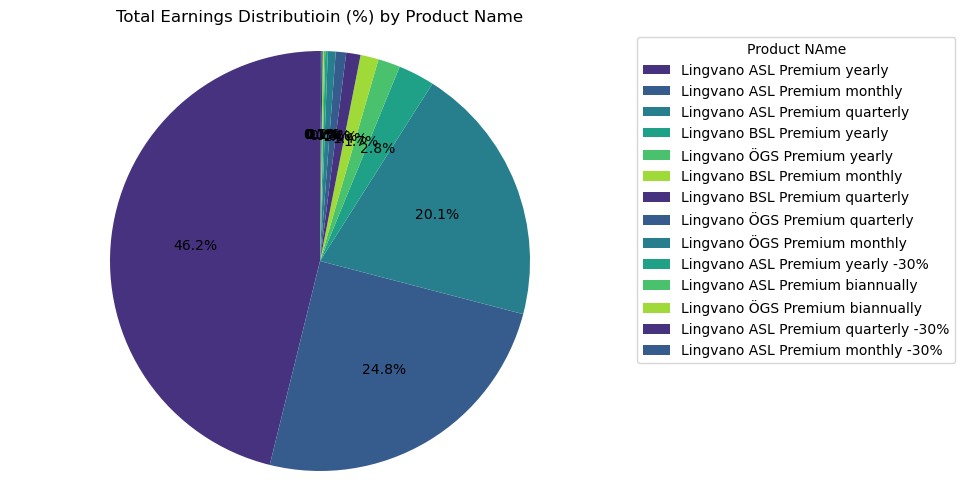

In [195]:
plt.figure(figsize=(8, 6))
plt.pie(total_amount['amount_distribution'], 
        autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("viridis"))
plt.title('Total Earnings Distributioin (%) by Product Name')
plt.axis('equal')  

plt.legend(total_amount['Product Name'], title="Product NAme", loc="upper left", bbox_to_anchor=(1, 1))


# Show the plot
plt.show()

Note: When showing distribution, the best approach is to use bar charts instead of pie charts when there are more than three labels. I have decided to present two chart options (bar and pie) for illustrative purposes.